In [ ]:
import torch
import numpy as np

a = torch.ones(3)
b = np.array(a)
print(type(b))

In [ ]:
a = torch.randint(10, (5,))
print(a)
c = (torch.randn(4, 1) * 2).long()
print(c)
b = a + c
print(b)
print(torch.mode(b,0))

In [ ]:
a = torch.load('train_test_indexes/splitted_indexes.pt')
print(a['test'])

In [ ]:
import torch

a = torch.ones(9,2).split(6)
print(a)

In [ ]:
a = {}
a.update({'a':2})
print(a)

In [ ]:
from tools.split_dataset import split_dataset
import numpy as np

imgs =torch.from_numpy(np.load('project_conic/CoNIC_Challenge/images.npy').astype(np.float64)/255).float().permute(0,3,1,2).contiguous()

split_dataset(imgs,'train_test_indexes/conic_trian_test_val_indexes.pt')

In [ ]:
import os 
dir = os.getcwd()
os.chdir('project_conic') 
print(os.getcwd())


In [1]:
from model.HoverNet import HoverNet,proc_np_hv
from Config.hovernet_config import arg
import torch

a = torch.rand(1,2,10,10)
print(*a.unbind(1)[0].shape)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(


1 10 10


In [13]:

import numpy as np
from tools.utils import draw_instance_map
import os
import torch



imgs = torch.from_numpy(np.load('project_conic/CoNIC_Challenge/images.npy').astype(np.float64)/255).float().permute(0,3,1,2).contiguous()
gt=np.load('numpy_prediction/Config_gt.npy')
index =  torch.load('train_test_indexes/splitted_indexes.pt')['test']
pred = np.load('numpy_prediction/Config.npy')
draw_instance_map(imgs,gt,index,'test/test3')


/usr/local/lib/python3.8/dist-packages/torchvision/utils.py:319: UserWarning: masks doesn't contain any mask. No mask was drawn
  warnings.warn("masks doesn't contain any mask. No mask was drawn")


In [1]:
import torch
import numpy as np
from Config.hovernet_config import arg
from model.HoverNet import HoverNet,proc_np_hv


idx= 7
net = HoverNet(arg.num_classes)
net.load_state_dict(torch.load(arg.model_para,map_location='cpu'))
net.eval()

imgs = torch.from_numpy(np.load('project_conic/CoNIC_Challenge/images.npy').astype(np.float64)/255).float().permute(0,3,1,2).contiguous()
pred=net(imgs[idx:idx+1])

tp,_np,hv = pred.values()
print(tp.shape)
print(_np.shape)
print(hv.shape)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  warnings.warn(


torch.Size([1, 7, 256, 256])
torch.Size([1, 2, 256, 256])
torch.Size([1, 2, 256, 256])


In [2]:
labels = torch.from_numpy(np.load('project_conic/CoNIC_Challenge/labels.npy').astype(np.float64)).long().permute(0,3,1,2).contiguous()
label = labels[idx:idx+1]

color = torch.tensor([[0, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 1, 0], [1, 0, 1], [0, 1, 1]], dtype=torch.float32, device='cpu')

import matplotlib.pyplot as plt

pic1 = color[label[0,1]].permute(2,0,1)
pic2 = color[tp.argmax(1).squeeze(0)].permute(2,0,1)
pic3 = _np.argmax(1).squeeze(0)

from torchvision.transforms.functional import to_pil_image


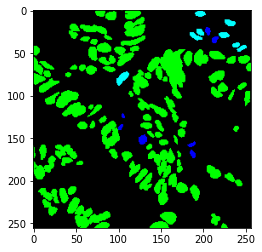

In [5]:

#pic3 = to_pil_image(pic3)

plt.imshow(pic1)
plt.show()

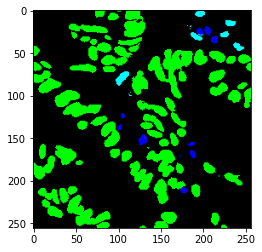

In [7]:
plt.imshow(pic2)
plt.show()

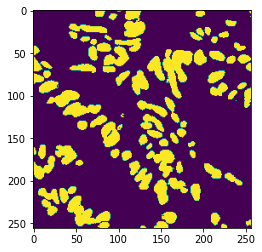

In [8]:
pic3 = to_pil_image(pic3.float())
plt.imshow(pic3)
plt.show()

Loading data into memory
Finishing loading data


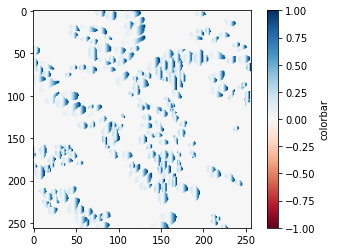

In [3]:
from tools.dataset import HoverNetCoNIC
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image


data=HoverNetCoNIC([256,256],transf=None)
h,v=data.hv_label_generator(data.labels[7]).unbind(0)

plt.imshow(h.squeeze(0).numpy(),cmap='RdBu')
cb = plt.colorbar(label='colorbar')
plt.clim(-1,1)
plt.show()


In [ ]:
from tools.dataset import HoverNetCoNIC

data=HoverNetCoNIC([256,256],transf=None)

In [5]:
from scipy.ndimage import center_of_mass
import numpy as np


a = np.ones((3,3),dtype=np.bool8)
x,y= center_of_mass(a)
print(x,y)
print(type(x))

1.0 1.0
<class 'numpy.float64'>


In [1]:
from tools.dataset import HoverNetCoNIC
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image


data=HoverNetCoNIC([256,256],transf=None)
h,v=data.hv_label_generator(data.labels[7]).unbind(0)


Loading data into memory
Finishing loading data
tensor(1.) tensor(0.0015)
tensor(1.) tensor(0.0068)
tensor(1.) tensor(0.0024)
tensor(1.) tensor(0.0001)
tensor(1.) tensor(0.0038)
tensor(1.) tensor(0.0001)
tensor(1.) tensor(0.0172)
tensor(1.) tensor(0.0043)
tensor(1.) tensor(0.0012)
tensor(1.) tensor(0.0085)
tensor(1.) tensor(0.0061)
tensor(1.) tensor(0.0004)
tensor(1.) tensor(0.0116)
tensor(1.) tensor(0.0077)
tensor(1.) tensor(0.0037)
tensor(1.) tensor(0.0091)
tensor(1.) tensor(0.0541)
tensor(1.) tensor(0.0106)
tensor(1.) tensor(0.0186)
tensor(1.) tensor(0.0042)
tensor(1.) tensor(0.0177)
tensor(1.) tensor(0.0023)
tensor(1.) tensor(0.0129)
tensor(1.) tensor(0.0031)
tensor(1.) tensor(0.0046)
tensor(1.) tensor(0.0186)
tensor(1.) tensor(0.0237)
tensor(1.) tensor(0.0033)
tensor(1.) tensor(0.0077)
tensor(1.) tensor(0.0160)
tensor(1.) tensor(0.0055)
tensor(1.) tensor(0.0848)
tensor(1.) tensor(0.0164)
tensor(1.) tensor(0.0047)
tensor(1.) tensor(0.0108)
tensor(1.) tensor(0.0125)
tensor(1.) tenso